In [1]:
%logstop
%logstart -rtq ~/.logs/dw.py append
%matplotlib inline
import matplotlib
import seaborn as sns
sns.set()
matplotlib.rcParams['figure.dpi'] = 144

In [44]:
from static_grader import grader

# DW Miniproject
## Introduction

The objective of this miniproject is to exercise your ability to wrangle tabular data set and aggregate large data sets into meaningful summary statistics. We'll work with the same medical data used in the `pw` miniproject but leverage the power of Pandas to more efficiently represent and act on our data.

## Downloading the data

We first need to download the data we'll be using from Amazon S3:

In [45]:
!mkdir dw-data
!wget http://dataincubator-wqu.s3.amazonaws.com/dwdata/201701scripts_sample.csv.gz -nc -P ./dw-data/
!wget http://dataincubator-wqu.s3.amazonaws.com/dwdata/201606scripts_sample.csv.gz -nc -P ./dw-data/
!wget http://dataincubator-wqu.s3.amazonaws.com/dwdata/practices.csv.gz -nc -P ./dw-data/
!wget http://dataincubator-wqu.s3.amazonaws.com/dwdata/chem.csv.gz -nc -P ./dw-data/

mkdir: cannot create directory ‘dw-data’: File exists
File ‘./dw-data/201701scripts_sample.csv.gz’ already there; not retrieving.

File ‘./dw-data/201606scripts_sample.csv.gz’ already there; not retrieving.

File ‘./dw-data/practices.csv.gz’ already there; not retrieving.

File ‘./dw-data/chem.csv.gz’ already there; not retrieving.



## Loading the data

Similar to the `PW` miniproject, the first step is to read in the data. The data files are stored as compressed CSV files. You can load the data into a Pandas DataFrame by making use of the `gzip` package to decompress the files and Panda's `read_csv` methods to parse the data into a DataFrame. You may want to check the Pandas documentation for parsing [CSV](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) files for reference.

For a description of the data set please, refer to the [PW miniproject](./pw.ipynb). **Note that all questions make use of the 2017 data only, except for Question 5 which makes use of both the 2017 and 2016 data.**

In [46]:
import pandas as pd
import numpy as np
import gzip

In [47]:
# load the 2017 data
scripts = pd.read_csv('./dw-data/201701scripts_sample.csv.gz')
scripts.head()

,practice,bnf_code,bnf_name,items,nic,act_cost,quantity
0,N85639,0106020C0,Bisacodyl_Tab E/C 5mg,1,0.39,0.47,12
1,N85639,0106040M0,Movicol Plain_Paed Pdr Sach 6.9g,1,4.38,4.07,30
2,N85639,0301011R0,Salbutamol_Inha 100mcg (200 D) CFF,1,1.50,1.40,1
3,N85639,0304010G0,Chlorphenamine Mal_Oral Soln 2mg/5ml,1,2.62,2.44,150
4,N85639,0401020K0,Diazepam_Tab 2mg,1,0.16,0.26,6


In [48]:
col_names=[ 'code', 'name', 'addr_1', 'addr_2', 'borough', 'village', 'post_code']
practices = pd.read_csv('./dw-data/practices.csv.gz')
#practices.column=col_names
practices = practices.set_axis(col_names, axis=1, inplace=False)
practices.head()

,code,name,addr_1,addr_2,borough,village,post_code
0,A81002,QUEENS PARK MEDICAL CENTRE,QUEENS PARK MEDICAL CTR,FARRER STREET,STOCKTON ON TEES,CLEVELAND,TS18 2AW
1,A81003,VICTORIA MEDICAL PRACTICE,THE HEALTH CENTRE,VICTORIA ROAD,HARTLEPOOL,CLEVELAND,TS26 8DB
2,A81004,WOODLANDS ROAD SURGERY,6 WOODLANDS ROAD,NaN,MIDDLESBROUGH,CLEVELAND,TS1 3BE
3,A81005,SPRINGWOOD SURGERY,SPRINGWOOD SURGERY,RECTORY LANE,GUISBOROUGH,NaN,TS14 7DJ
4,A81006,TENNANT STREET MEDICAL PRACTICE,TENNANT ST MED PRACT,FARRER STREET,STOCKTON ON TEES,CLEVELAND,TS18 2AT


In [49]:
chem = pd.read_csv('./dw-data/chem.csv.gz')
chem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3487 entries, 0 to 3486
Data columns (total 2 columns):
CHEM SUB    3487 non-null object
NAME        3487 non-null object
dtypes: object(2)
memory usage: 54.6+ KB


Now that we've loaded in the data, let's first replicate our results from the `PW` miniproject. Note that we are now working with a larger data set so the answers will be different than in the `PW` miniproject even if the analysis is the same.

## Question 1: summary_statistics

In the `PW` miniproject we first calculated the total, mean, standard deviation, and quartile statistics of the `'items'`, `'quantity'`', `'nic'`, and `'act_cost'` fields. To do this we had to write some functions to calculate the statistics and apply the functions to our data structure. The DataFrame has a `describe` method that will calculate most (not all) of these things for us.

Submit the summary statistics to the grader as a list of tuples: [('act_cost', (total, mean, std, q25, median, q75)), ...]

In [50]:
scripts.describe()

,items,nic,act_cost,quantity
count,973193.000000,973193.000000,973193.000000,973193.000000
mean,9.133136,73.058915,67.986613,741.329835
std,29.204198,188.070257,174.401703,3665.426958
min,1.000000,0.000000,0.040000,0.000000
25%,1.000000,7.800000,7.330000,28.000000
50%,2.000000,22.640000,21.220000,100.000000
75%,6.000000,65.000000,60.670000,350.000000
max,2384.000000,16320.000000,15108.320000,577720.000000


In [51]:
scripts['items'].describe()

count    973193.000000
mean          9.133136
std          29.204198
min           1.000000
25%           1.000000
50%           2.000000
75%           6.000000
max        2384.000000
Name: items, dtype: float64

In [52]:
np.std(scripts['act_cost'])

174.40161372016178

In [53]:
aa=scripts['items'].describe().tolist()
aa[0]=np.sum(scripts['items'])
i=tuple(aa[:3]+aa[4:7])

aa=scripts['quantity'].describe().tolist()
aa[0]=np.sum(scripts['quantity'])
q=tuple(aa[0:3]+aa[4:7])

aa=scripts['nic'].describe().tolist()
aa[0]=np.sum(scripts['nic'])
n=tuple(aa[0:3]+aa[4:7])

aa=scripts['act_cost'].describe().tolist()
aa[0]=np.sum(scripts['act_cost'])
a=tuple(aa[0:3]+aa[4:7])

In [54]:
summary_stats = [('items', i),
           ('quantity', q),
           ('nic',n),
           ('act_cost',a)]

In [55]:
summary_stats 

[('items', (8888304, 9.133135976111625, 29.204198282803603, 1.0, 2.0, 6.0)),
 ('quantity',
  (721457006, 741.3298348837282, 3665.426958467915, 28.0, 100.0, 350.0)),
 ('nic',
  (71100424.84000002, 73.05891517920908, 188.070256906825, 7.8, 22.64, 65.0)),
 ('act_cost',
  (66164096.11999999,
   67.98661326170655,
   174.40170332301963,
   7.33,
   21.22,
   60.67))]

In [56]:
grader.score.dw__summary_statistics(summary_stats)

Your score:  1.0


## Question 2: most_common_item

We can also easily compute summary statistics on groups within the data. In the `pw` miniproject we had to explicitly construct the groups based on the values of a particular field. Pandas will handle that for us via the `groupby` method. This process is [detailed in the Pandas documentation](https://pandas.pydata.org/pandas-docs/stable/groupby.html).

Use `groupby` to calculate the total number of items dispensed for each `'bnf_name'`. Find the item with the highest total and return the result as `[(bnf_name, total)]`.

In [57]:
group_bnf=scripts.groupby('bnf_name')['items'].sum()
group_bnf.head()

bnf_name
365 Film 10cm x 12cm VP Adh Film Dress      2
365 Non Adherent 10cm x 10cm Pfa Plas Fa    3
365 Non Adherent 10cm x 20cm Pfa Plas Fa    1
365 Non Woven Island 8cm x 10cm Adh Dres    1
365 Transpt Island 5cm x 7.2cm VP Adh Fi    2
Name: items, dtype: int64

In [58]:
#total=max_item.max()
#total

In [59]:
#aah=max_item[max_item.values==total]

In [60]:
#aah[:1]

In [61]:
m=max(group_bnf)
for i in range(len(group_bnf)):
    a=group_bnf[i]
    n=group_bnf.index[i]
    if a==m:
        t=tuple()
        t=n,a

In [62]:
print(t)
most_common_item = list()
most_common_item.append(t)

('Omeprazole_Cap E/C 20mg', 218583)


In [63]:
#most_common_item = [('0206020A0', 121.93611)]

In [64]:
grader.score.dw__most_common_item(most_common_item)

Your score:  1.0


## Question 3: items_by_region

Now let's find the most common item by post code. The post code information is in the `practices` DataFrame, and we'll need to `merge` it into the `scripts` DataFrame. Pandas provides [extensive documentation](https://pandas.pydata.org/pandas-docs/stable/merging.html) with diagrammed examples on different methods and approaches for joining data. The `merge` method is only one of many possible options.

Return your results as a list of tuples `(post code, item name, amount dispensed as % of total)`. Sort your results ascending alphabetically by post code and take only results from the first 100 post codes.

**NOTE:** Some practices have multiple postal codes associated with them. Use the alphabetically first postal code. Note some postal codes may have multiple `'bnf_name'` with the same prescription rate for the maximum. In this case, take the alphabetically first `'bnf_name'` (as in the PW miniproject).

In [65]:
group_practice = scripts.groupby(['practice','bnf_name'])['items'].sum()
group_practice.head()

practice  bnf_name                                
A81005    3m Health Care_Cavilon Durable Barrier C    1
          3m Health Care_Cavilon No Sting Barrier     1
          Acetic Acid_Ear Spy 2% 5ml                  1
          Acetylcy_Inj 200mg/ml 10ml Amp              1
          Aciclovir_Crm 5%                            3
Name: items, dtype: int64

In [66]:
L=scripts['practice'].unique()
L.sort()
len(L)

856

In [67]:
prac_2= practices.sort_values('post_code')

In [68]:
prac = prac_2[prac_2['code'] =='E82060']

In [69]:
group_par = prac_2.groupby('code')['post_code'].min()
group_par.head()

code
A81001    TS18 1HU
A81002    TS18 2AW
A81003    TS25 1QU
A81004     TS1 3BE
A81005    TS14 7DJ
Name: post_code, dtype: object

In [70]:
D = dict()
for key in L:
    D[key] = group_par[key]

In [71]:
df = pd.DataFrame()
list_index = list()
list_post_code = list()
for i in scripts.index:
    list_index.append(i)
    #a = scripts['practice'][i]
    list_post_code.append(D[scripts['practice'][i]])

In [72]:
scripts['post_code']=list_post_code

In [73]:
group_scripts_post_bnf = scripts.groupby(['post_code','bnf_name'])['items'].sum()
group_scripts_post_bnf.head()

post_code  bnf_name                                
B11 4BW    3m Health Care_Cavilon Durable Barrier C     7
           3m Health Care_Cavilon No Sting Barrier      2
           Abasaglar KwikPen_100u/ml 3ml Pf Pen         2
           Abidec_Dps                                  63
           Able Spacer + Sml/Med Mask                   1
Name: items, dtype: int64

In [74]:
bb = scripts[(scripts['post_code'] == 'B11 4BW') & (scripts['bnf_name']=='Abidec_Dps')]
print(bb)

       practice   bnf_code    bnf_name  items     nic  act_cost  quantity  \
530007   M85078  090607000  Abidec_Dps     41  203.13    188.56      1525   
533173   M85774  090607000  Abidec_Dps      5   23.31     21.65       175   
534179   Y02620  090607000  Abidec_Dps     17   56.61     52.62       425   

       post_code  
530007   B11 4BW  
533173   B11 4BW  
534179   B11 4BW  


In [75]:
df=pd.DataFrame(group_scripts_post_bnf)
df.rename(columns={'items':'things'},inplace=True)
df =df.reset_index(level='bnf_name')
df.head()

,bnf_name,things
post_code,,
B11 4BW,3m Health Care_Cavilon Durable Barrier C,7
B11 4BW,3m Health Care_Cavilon No Sting Barrier,2
B11 4BW,Abasaglar KwikPen_100u/ml 3ml Pf Pen,2
B11 4BW,Abidec_Dps,63
B11 4BW,Able Spacer + Sml/Med Mask,1


In [76]:
gg = df.groupby('post_code')['things'].max()

In [77]:
GG =gg[:100]
aa = df[(df['things'] == 706) & (df.index=='B11 4BW')]

In [78]:
list_tuple = list()
for i in range(100):
    t=tuple()
    x = GG[i]
    y = GG.index[i]
    aa = df[(df['things'] == x) & (df.index==y)]
    t=y,aa['bnf_name'][0],x
    list_tuple.append(t)

In [79]:
group_scripts_post = scripts.groupby('post_code')['items'].sum()
group_scripts_post_100=group_scripts_post[:100]

In [80]:
items_by_region = list()

for i in range(100):
    t = tuple()
    x,y,z = list_tuple[i]
    z2 = z/float(group_scripts_post_100[i])
    t = x,y,z2
    items_by_region.append(t)

In [81]:
#items_by_region = [("B11 4BW", "Salbutamol_Inha 100mcg (200 D) CFF", 0.0310589063)] * 100

In [82]:
grader.score.dw__items_by_region(items_by_region)

Your score:  1.0


## Question 4: script_anomalies

Drug abuse is a source of human and monetary costs in health care. A first step in identifying practitioners that enable drug abuse is to look for practices where commonly abused drugs are prescribed unusually often. Let's try to find practices that prescribe an unusually high amount of opioids. The opioids we'll look for are given in the list below.

In [83]:
opioids = ['morphine', 'oxycodone', 'methadone', 'fentanyl', 'pethidine', 'buprenorphine', 'propoxyphene', 'codeine']

In [82]:
len(opioids)

8

These are generic names for drugs, not brand names. Generic drug names can be found using the `'bnf_code'` field in `scripts` along with the `chem` table.. Use the list of opioids provided above along with these fields to make a new field in the `scripts` data that flags whether the row corresponds with a opioid prescription.

In [84]:
chem.head()

,CHEM SUB,NAME
0,0101010A0,Alexitol Sodium
1,0101010B0,Almasilate
2,0101010C0,Aluminium Hydroxide
3,0101010D0,Aluminium Hydroxide With Magnesium
4,0101010E0,Hydrotalcite


In [108]:
chem_names=chem['CHEM SUB'].unique()
chem_names[chem_names=='0106020C0']

array(['0106020C0'], dtype=object)

In [ ]:
chem_names[chem_names==opioids[1]]

In [94]:
matching_names=[chem_names==opioids[1]]


False

In [80]:
practices.head()

,code,name,addr_1,addr_2,borough,village,post_code
0,A81002,QUEENS PARK MEDICAL CENTRE,QUEENS PARK MEDICAL CTR,FARRER STREET,STOCKTON ON TEES,CLEVELAND,TS18 2AW
1,A81003,VICTORIA MEDICAL PRACTICE,THE HEALTH CENTRE,VICTORIA ROAD,HARTLEPOOL,CLEVELAND,TS26 8DB
2,A81004,WOODLANDS ROAD SURGERY,6 WOODLANDS ROAD,NaN,MIDDLESBROUGH,CLEVELAND,TS1 3BE
3,A81005,SPRINGWOOD SURGERY,SPRINGWOOD SURGERY,RECTORY LANE,GUISBOROUGH,NaN,TS14 7DJ
4,A81006,TENNANT STREET MEDICAL PRACTICE,TENNANT ST MED PRACT,FARRER STREET,STOCKTON ON TEES,CLEVELAND,TS18 2AT


In [73]:
scripts.head()

,practice,bnf_code,bnf_name,items,nic,act_cost,quantity,post_code
0,N85639,0106020C0,Bisacodyl_Tab E/C 5mg,1,0.39,0.47,12,CH44 5UF
1,N85639,0106040M0,Movicol Plain_Paed Pdr Sach 6.9g,1,4.38,4.07,30,CH44 5UF
2,N85639,0301011R0,Salbutamol_Inha 100mcg (200 D) CFF,1,1.50,1.40,1,CH44 5UF
3,N85639,0304010G0,Chlorphenamine Mal_Oral Soln 2mg/5ml,1,2.62,2.44,150,CH44 5UF
4,N85639,0401020K0,Diazepam_Tab 2mg,1,0.16,0.26,6,CH44 5UF


In [71]:
len(scripts.practice.unique())

856

In [ ]:
chem.

In [44]:
(scripts['bnf_name'].unique(), opioids)

(array(['Bisacodyl_Tab E/C 5mg', 'Movicol Plain_Paed Pdr Sach 6.9g',
        'Salbutamol_Inha 100mcg (200 D) CFF', ...,
        'Milex Slc Arcing-Arcing Spring(TypeC)Vag', 'R1 Gel 6g Sach',
        'R2 Lot 1g Sach'], dtype=object),
 ['morphine',
  'oxycodone',
  'methadone',
  'fentanyl',
  'pethidine',
  'buprenorphine',
  'propoxyphene',
  'codeine'])

In [117]:
state_abbr = dict(zip(scripts['bnf_name'].unique(), opioids))

{'Bisacodyl_Tab E/C 5mg': 'morphine',
 'Movicol Plain_Paed Pdr Sach 6.9g': 'oxycodone',
 'Salbutamol_Inha 100mcg (200 D) CFF': 'methadone',
 'Chlorphenamine Mal_Oral Soln 2mg/5ml': 'fentanyl',
 'Diazepam_Tab 2mg': 'pethidine',
 'Prochlpzine Mal_Tab 5mg': 'buprenorphine',
 'Co-Codamol_Cap 30mg/500mg': 'propoxyphene',
 'Zapain_Tab 30mg/500mg': 'codeine'}

In [106]:
aa = scripts[scripts['bnf_name'] == 'Bisacodyl_Tab E/C 5mg']
aa.head()

,practice,bnf_code,bnf_name,items,nic,act_cost,quantity,post_code
0,N85639,0106020C0,Bisacodyl_Tab E/C 5mg,1,0.39,0.47,12,CH44 5UF
93,N81013,0106020C0,Bisacodyl_Tab E/C 5mg,19,28.10,28.14,860,SK11 6JL
1579,N81029,0106020C0,Bisacodyl_Tab E/C 5mg,50,67.73,67.51,2074,SK11 6JL
3392,N81062,0106020C0,Bisacodyl_Tab E/C 5mg,40,50.43,50.69,1544,SK11 6JL
5424,N81085,0106020C0,Bisacodyl_Tab E/C 5mg,35,43.42,43.83,1328,SK11 6JL


In [111]:
state_abbr = dict(zip(scripts['bnf_name'].unique(), opioids))

In [112]:
dict_opioids = {key : [] for key in opioids}
for s in opioids:
    for el in scripts['bnf_name'].unique():
        if s in el.lower():
            dict_opioids[s].append(el)

In [118]:
dict_opioids

{'morphine': [],
 'oxycodone': ['Oxycodone HCl_Oral Soln 5mg/5ml S/F',
  'Oxycodone HCl_Cap 5mg',
  'Oxycodone HCl_Tab 10mg M/R',
  'Oxycodone HCl_Tab 5mg M/R',
  'Oxycodone HCl_Tab 15mg M/R',
  'Oxycodone HCl/NaloxoneHCl_Tab 40/20mgM/R',
  'Oxycodone HCl_Tab 30mg M/R',
  'Oxycodone HCl/Naloxone HCl_Tab 10/5mgM/R',
  'Oxycodone HCl/NaloxoneHCl_Tab 5/2.5mgM/R',
  'Oxycodone HCl/NaloxoneHCl_Tab 20/10mgM/R',
  'Oxycodone HCl_Tab 20mg M/R',
  'Oxycodone HCl_Oral Soln 10mg/1ml S/F',
  'Oxycodone HCl_Inj 10mg/ml 2ml Amp',
  'Oxycodone HCl_Inj 50mg/ml 1ml Amp',
  'Oxycodone HCl_Cap 10mg',
  'Oxycodone HCl_Tab 40mg M/R',
  'Oxycodone HCl_Inj 10mg/ml 1ml Amp',
  'Oxycodone HCl_Tab 80mg M/R',
  'Oxycodone HCl_Cap 20mg',
  'Oxycodone HCl_Tab 60mg M/R',
  'Oxycodone HCl_Tab 120mg M/R'],
 'methadone': ['Methadone HCl_Mix 1mg/1ml',
  'Methadone HCl_Mix 1mg/1ml S/F',
  'Methadone HCl_Tab 5mg',
  'Methadone HCl_Oral Conc 20mg/1ml S/F',
  'Methadone HCl_Oral Conc 10mg/1ml S/F'],
 'fentanyl': ['Fentanyl

In [113]:
gh = set()
for key in dict_opioids:
    for el in dict_opioids[key]:
        gh.add(el)
gh = list(gh)
list_bnf_opioids = {i : gh[i] for i in range(len(gh))}

In [119]:
len(list_bnf_opioids)

81

In [120]:
opioids_one_zero = list()
for i in scripts.index:
    if scripts['bnf_name'][i] in list_bnf_opioids.values():
        opioids_one_zero.append(1)
    else:
        opioids_one_zero.append(0)

In [121]:
scripts['opioids']=opioids_one_zero

In [122]:
scripts.head()

,practice,bnf_code,bnf_name,items,nic,act_cost,quantity,post_code,opioids
0,N85639,0106020C0,Bisacodyl_Tab E/C 5mg,1,0.39,0.47,12,CH44 5UF,0
1,N85639,0106040M0,Movicol Plain_Paed Pdr Sach 6.9g,1,4.38,4.07,30,CH44 5UF,0
2,N85639,0301011R0,Salbutamol_Inha 100mcg (200 D) CFF,1,1.50,1.40,1,CH44 5UF,0
3,N85639,0304010G0,Chlorphenamine Mal_Oral Soln 2mg/5ml,1,2.62,2.44,150,CH44 5UF,0
4,N85639,0401020K0,Diazepam_Tab 2mg,1,0.16,0.26,6,CH44 5UF,0


In [143]:
group_scripts_practice = scripts.groupby('practice')['opioids'].sum()
group_scripts_practice.head()

practice
A81005    18
A81007    15
A81011    21
A81012    19
A81017    28
Name: opioids, dtype: int64

In [147]:
total_opioid=sum(group_scripts_practice)
total_opioid

10312

In [138]:
total_practice=scripts.groupby('practice')['items'].sum()
total_practice.head()

practice
A81005    16326
A81007    14751
A81011    21791
A81012    13273
A81017    34264
Name: items, dtype: int64

In [140]:
opioids_per_practice = group_scripts_practice/total_practice
opioids_per_practice.head()

practice
A81005    0.001103
A81007    0.001017
A81011    0.000964
A81012    0.001431
A81017    0.000817
dtype: float64

In [141]:
over_all = sum(group_scripts_practice)/float(sum(total_practice))
over_all

0.001160176339603146

In [144]:
relative_opioids_per_practice=opioids_per_practice-over_all
relative_opioids_per_practice.head()

practice
A81005   -0.000058
A81007   -0.000143
A81011   -0.000196
A81012    0.000271
A81017   -0.000343
dtype: float64

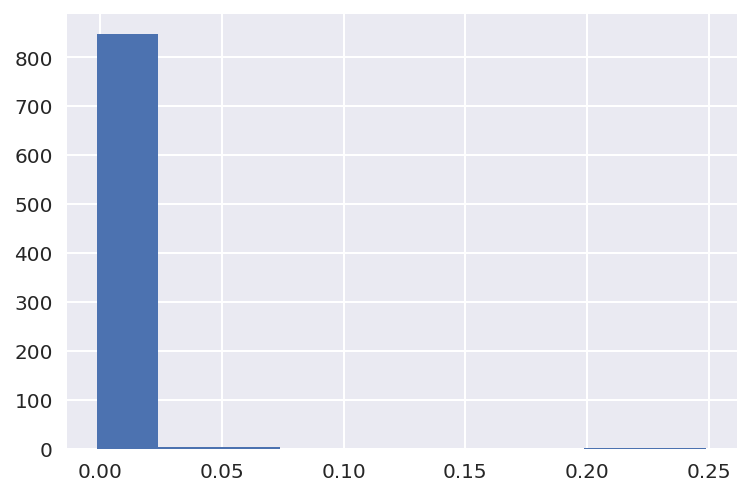

In [145]:
relative_opioids_per_practice.hist()

Now for each practice calculate the proportion of its prescriptions containing opioids.

**Hint:** Consider the following list: `[0, 1, 1, 0, 0, 0]`. What proportion of the entries are 1s? What is the mean value?

How do these proportions compare to the overall opioid prescription rate? Subtract off the proportion of all prescriptions that are opioids from each practice's proportion.

Now that we know the difference between each practice's opioid prescription rate and the overall rate, we can identify which practices prescribe opioids at above average or below average rates. However, are the differences from the overall rate important or just random deviations? In other words, are the differences from the overall rate big or small?

To answer this question we have to quantify the difference we would typically expect between a given practice's opioid prescription rate and the overall rate. This quantity is called the **standard error**, and is related to the **standard deviation**, $\sigma$. The standard error in this case is

$$ \frac{\sigma}{\sqrt{n}} $$

where $n$ is the number of prescriptions each practice made. Calculate the standard error for each practice. Then divide `relative_opioids_per_practice` by the standard errors. We'll call the final result `opioid_scores`.

In [150]:
standard_error_per_practice = np.sqrt(sum(opioids_per_practice-over_all)**2/group_scripts_practice)
opioid_scores = standard_error_per_practice/relative_opioids_per_practice
opioid_scores.head()

practice
A81005   -4800.968813
A81007   -2115.499103
A81011   -1303.990340
A81012     992.806433
A81017    -646.889004
dtype: float64

The quantity we have calculated in `opioid_scores` is called a **z-score**:

$$ \frac{\bar{X} - \mu}{\sqrt{\sigma^2/n}} $$

Here $\bar{X}$ corresponds with the proportion for each practice, $\mu$ corresponds with the proportion across all practices, $\sigma^2$ corresponds with the variance of the proportion across all practices, and $n$ is the number of prescriptions made by each practice. Notice $\bar{X}$ and $n$ will be different for each practice, while $\mu$ and $\sigma$ are determined across all prescriptions, and so are the same for every z-score. The z-score is a useful statistical tool used for hypothesis testing, finding outliers, and comparing data about different types of objects or events.

Now that we've calculated this statistic, take the 100 practices with the largest z-score. Return your result as a list of tuples in the form `(practice_name, z-score, number_of_scripts)`. Sort your tuples by z-score in descending order. Note that some practice codes will correspond with multiple names. In this case, use the first match when sorting names alphabetically.

In [157]:
#print(opioid_scores)
op=opioid_scores.sort_values()[:-100]
op

practice
Y05670           -inf
Y02203           -inf
Y02318           -inf
Y02532           -inf
Y02533           -inf
             ...     
Y03640    1757.104200
A89621    1784.281700
P83020    1853.495285
M85068    1899.356533
P82640    1949.183041
Length: 756, dtype: float64

In [158]:
scripts[scripts['practice']=='Y05670']

,practice,bnf_code,bnf_name,items,nic,act_cost,quantity,post_code,opioids
373602,Y05670,0301011R0,Salbutamol_Inha B/A 100mcg (200 D) CFF,1,6.30,5.84,1,SR5 2LT,0
373603,Y05670,0403030E0,Fluoxetine HCl_Cap 20mg,1,0.41,0.49,14,SR5 2LT,0
373604,Y05670,0406000T0,Prochlpzine Mal_Tab 5mg,1,0.97,0.91,28,SR5 2LT,0
373605,Y05670,0407010H0,Paracet_Oral Susp 250mg/5ml S/F,1,3.94,3.66,400,SR5 2LT,0
373606,Y05670,0501011P0,Phenoxymethylpenicillin Pot_Tab 250mg,2,5.94,5.72,160,SR5 2LT,0
373607,Y05670,0501013B0,Amoxicillin_Cap 500mg,3,3.81,3.56,63,SR5 2LT,0
373608,Y05670,1001010J0,Ibuprofen_Oral Susp 100mg/5ml S/F,1,2.50,2.33,200,SR5 2LT,0
373609,Y05670,1103010C0,Chloramphen_Eye Dps 0.5%,1,1.52,1.42,10,SR5 2LT,0
373610,Y05670,1103010C0,Chloramphen_Eye Oint 1%,1,2.27,2.11,4,SR5 2LT,0
373611,Y05670,1202010C0,Beclomet Diprop_Nsl Spy 50mcg (200 D),1,2.10,1.96,1,SR5 2LT,0


In [50]:
unique_practices = ...
anomalies = [("NATIONAL ENHANCED SERVICE", 11.6958178629, 7)] * 100

In [51]:
results.head()

NameError: name 'results' is not defined

In [71]:
chem.head()

,CHEM SUB,NAME
0,0101010A0,Alexitol Sodium
1,0101010B0,Almasilate
2,0101010C0,Aluminium Hydroxide
3,0101010D0,Aluminium Hydroxide With Magnesium
4,0101010E0,Hydrotalcite


In [72]:
# dropping ALL duplicte values 
chem = chem.sort_values('CHEM SUB', ascending=False)
chem = chem.drop_duplicates(subset='CHEM SUB', keep='first')
chem.head()

,CHEM SUB,NAME
3431,2399,Ostomy Appliances R/Sub Allowed Pre 1985
3430,2398,Urostomy Sets
3429,2396,Urostomy Bags
3428,2394,Two Piece Ostomy Systems
3427,2393,Accessories (Guernsey)


In [13]:
chem_scripts = scripts.merge(chem, left_on='bnf_code', right_on='CHEM SUB', how='left')
chem_scripts.head()

,practice,bnf_code,bnf_name,items,nic,act_cost,quantity,CHEM SUB,NAME
0,N85639,0106020C0,Bisacodyl_Tab E/C 5mg,1,0.39,0.47,12,0106020C0,Bisacodyl
1,N85639,0106040M0,Movicol Plain_Paed Pdr Sach 6.9g,1,4.38,4.07,30,0106040M0,Macrogol 3350
2,N85639,0301011R0,Salbutamol_Inha 100mcg (200 D) CFF,1,1.50,1.40,1,0301011R0,Salbutamol
3,N85639,0304010G0,Chlorphenamine Mal_Oral Soln 2mg/5ml,1,2.62,2.44,150,0304010G0,Chlorphenamine Maleate
4,N85639,0401020K0,Diazepam_Tab 2mg,1,0.16,0.26,6,0401020K0,Diazepam


In [116]:
chem_scripts = scripts.merge(chem, left_on='bnf_code', right_on='CHEM SUB', how='left')
chem_scripts.head()

# mark prescriptions that contain opioids as positive `is_opioid`
opioid_pattern = '|'.join(opioids)
opioid_chem_scripts = chem_scripts.copy()
opioid_chem_scripts['is_opioid'] = opioid_chem_scripts["NAME"].str.contains(opioid_pattern, na=False, case=False, regex=True)

# for `is_opioid`, set False as 0 and True as 1 for easy computation
opioid_chem_scripts['is_opioid'].replace({ False: 0, True: 1 }, inplace=True)

# calc the opioid prescription rate
opioid_prescription_rate = opioid_chem_scripts['is_opioid'].mean()

# get the number of opioid prescriptions per practice
opioid_scripts_per_practice = opioid_chem_scripts[['practice', 'is_opioid', 'bnf_name']].groupby(['practice']).agg({'is_opioid': 'sum', 'bnf_name': 'count'})
opioid_scripts_per_practice = opioid_scripts_per_practice.rename(columns={'bnf_name': 'practice_script_count', 'is_opioid': 'opioid_script_count'})
opioid_scripts_per_practice['opioid_per_practice'] = opioid_scripts_per_practice['opioid_script_count'] / opioid_scripts_per_practice['practice_script_count'] 

relative_opioids_per_practice = opioid_scripts_per_practice.copy()
relative_opioids_per_practice = relative_opioids_per_practice.reset_index()
relative_opioids_per_practice['relative_opioids_per_practice'] = relative_opioids_per_practice['opioid_per_practice'] - opioid_prescription_rate


relative_opioids_per_practice['std_error'] = round(opioid_chem_scripts['is_opioid'].std()/ np.sqrt(relative_opioids_per_practice['practice_script_count']), 5)
relative_opioids_per_practice['z_score'] =  (relative_opioids_per_practice['relative_opioids_per_practice'] /(relative_opioids_per_practice['std_error']))
relative_opioids_per_practice.sort_values(by=('z_score'), ascending=False, inplace=True)

unique_practices = (relative_opioids_per_practice.merge(practices, left_on="practice", right_on="code", how="inner").sort_values(['code', 'name'])
                    .drop_duplicates('code')
                    .reset_index())

anomalies1 = unique_practices.sort_values(by=('z_score'), ascending=False)
results = []

for index, item in anomalies1.iterrows():
    data = (item['name'], item['z_score'], item['practice_script_count'])
    results.append(data)
anomalies=results[:100]

In [118]:
unique_practices.head()

,index,practice,opioid_script_count,practice_script_count,opioid_per_practice,relative_opioids_per_practice,std_error,z_score,code,name,addr_1,addr_2,borough,village,post_code
0,629,A81005,50,1509,0.033135,-0.002638,0.00478,-0.551926,A81005,SPRINGWOOD SURGERY,SPRINGWOOD SURGERY,RECTORY LANE,GUISBOROUGH,NaN,TS14 7DJ
1,135,A81007,63,1456,0.043269,0.007496,0.00487,1.539322,A81007,BANKHOUSE SURGERY,ONE LIFE HARTLEPOOL,PARK ROAD,HARTLEPOOL,CLEVELAND,TS24 7PW
2,62,A81011,73,1569,0.046526,0.010754,0.00469,2.292903,A81011,CHADWICK PRACTICE,ONE LIFE HARTLEPOOL,PARK ROAD,HARTLEPOOL,CLEVELAND,TS24 7PW
3,162,A81012,57,1333,0.042761,0.006988,0.00509,1.372880,A81012,WESTBOURNE MEDICAL CENTRE,WESTBOURNE MEDICAL CENTRE,7 TRINITY MEWS N. ORMESBY,MIDDLESBROUGH,NaN,TS3 6AL
4,336,A81017,82,2151,0.038122,0.002349,0.00400,0.587268,A81017,WOODBRIDGE PRACTICE,THE HEALTH CENTRE,TRENCHARD AVE THORNABY,STOCKTON ON TEES,CLEVELAND,TS17 0EE


In [74]:
len(anomalies)

100

In [86]:
grader.score.dw__script_anomalies(anomalies)

Error!
You have been rate limited for exceeding the limit of 3 per 1 minute.
Please slow down your submission rate.


## Question 5: script_growth

Another way to identify anomalies is by comparing current data to historical data. In the case of identifying sites of drug abuse, we might compare a practice's current rate of opioid prescription to their rate 5 or 10 years ago. Unless the nature of the practice has changed, the profile of drugs they prescribe should be relatively stable. We might also want to identify trends through time for business reasons, identifying drugs that are gaining market share. That's what we'll do in this question.

We'll load in beneficiary data from 6 months earlier, June 2016, and calculate the percent growth in prescription rate from June 2016 to January 2017 for each `bnf_name`. We'll return the 50 items with largest growth and the 50 items with the largest shrinkage (i.e. negative percent growth) as a list of tuples sorted by growth rate in descending order in the format `(script_name, growth_rate, raw_2016_count)`. You'll notice that many of the 50 fastest growing items have low counts of prescriptions in 2016. Filter out any items that were prescribed less than 50 times.

In [13]:
scripts16 = pd.read_csv('./dw-data/201606scripts_sample.csv.gz')
#scripts16=scripts16[scripts16['items'] >= 50]
scripts16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973193 entries, 0 to 973192
Data columns (total 7 columns):
practice    973193 non-null object
bnf_code    973193 non-null object
bnf_name    973193 non-null object
items       973193 non-null int64
nic         973193 non-null float64
act_cost    973193 non-null float64
quantity    973193 non-null int64
dtypes: float64(2), int64(2), object(3)
memory usage: 52.0+ MB


In [53]:
#scripts16 = scripts16.sort_values('bnf_name', ascending=False)
#scripts16 = scripts16.drop_duplicates(subset='bnf_name', keep='first')
#scripts16.head()

In [54]:
scripts16_check=scripts16.groupby('bnf_name')['items'].sum()
scripts16_check=pd.DataFrame(scripts16_check)
scripts16_check.rename(columns={'items':'item16'},inplace=True)
scripts16_check =scripts16_check.reset_index(level='bnf_name')
scripts16_check=scripts16_check[scripts16_check.item16 > 50]
scripts16_check.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4212 entries, 10 to 13477
Data columns (total 2 columns):
bnf_name    4212 non-null object
item16      4212 non-null int64
dtypes: int64(1), object(1)
memory usage: 98.7+ KB


In [55]:
#scripts_check = scripts_check.sort_values('bnf_name', ascending=False)
#scripts_check = scripts_check.drop_duplicates(subset='bnf_name', keep='first')
#scripts_check.info()

In [56]:
scripts.bnf_name.nunique()

13471

In [57]:
scripts_check=scripts.groupby('bnf_name')['items'].sum()
scripts_check=pd.DataFrame(scripts_check)
scripts_check.rename(columns={'items':'item17'},inplace=True)
scripts_check =scripts_check.reset_index(level='bnf_name')
#scripts_check=scripts_check[scripts_check.item17 > 50]
scripts_check.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13471 entries, 0 to 13470
Data columns (total 2 columns):
bnf_name    13471 non-null object
item17      13471 non-null int64
dtypes: int64(1), object(1)
memory usage: 210.6+ KB


In [58]:
result= pd.merge(scripts_check, scripts16_check, on='bnf_name')
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4172 entries, 0 to 4171
Data columns (total 3 columns):
bnf_name    4172 non-null object
item17      4172 non-null int64
item16      4172 non-null int64
dtypes: int64(2), object(1)
memory usage: 130.4+ KB


In [59]:
result['growth']= (result['item17']-result['item16'])/result['item16']
result.head()

,bnf_name,item17,item16,growth
0,3m Health Care_Cavilon Durable Barrier C,4132,5129,-0.194385
1,3m Health Care_Cavilon No Sting 1ml Barr,517,593,-0.128162
2,3m Health Care_Cavilon No Sting 3ml Barr,150,204,-0.264706
3,3m Health Care_Cavilon No Sting Barrier,968,1103,-0.122393
4,A.S Saliva Orthana Spy 50ml (App),163,114,0.429825


In [60]:
growth=result.sort_values('growth', ascending=False)

top=growth.head(50)
bottom=growth.tail(50)
all=pd.concat([top,bottom])

In [61]:
all.tail()

,bnf_name,item17,item16,growth
3656,Sunsense_Toddler Suncare Milk Spf 50+,3,56,-0.946429
3659,SuperCheck Plus (Reagent)_Strips,5,123,-0.959350
3357,Rimexolone_Eye Dps 10mg/ml,3,74,-0.959459
2372,Macrogol_Co Oral Pdr Sach,1,71,-0.985915
3111,Polyalc_Eye Dps 1.4%,1,806,-0.998759


In [62]:
results = []

for index, item in all.iterrows():
    data = (item['bnf_name'], item['growth'], item['item16'])
    results.append(data)
script_growth=results[:100]


In [66]:
len(script_growth)

100

In [26]:
scripts16 = pd.read_csv('./dw-data/201606scripts_sample.csv.gz')
#scripts16=scripts16[scripts16['items'] >= 50]

scripts16_check=scripts16.groupby('bnf_name')['items'].sum()
scripts16_check=pd.DataFrame(scripts16_check)
scripts16_check.rename(columns={'items':'item16'},inplace=True)
scripts16_check =scripts16_check.reset_index(level='bnf_name')
scripts16_check=scripts16_check[scripts16_check.item16 >= 50]


scripts_check=scripts.groupby('bnf_name')['items'].sum()
scripts_check=pd.DataFrame(scripts_check)
scripts_check.rename(columns={'items':'item17'},inplace=True)
scripts_check =scripts_check.reset_index(level='bnf_name')
#scripts_check=scripts_check[scripts_check.item17 > 50]


result= pd.merge(scripts_check, scripts16_check, left_on='bnf_name',right_on='bnf_name', how='inner')
result=result.dropna()
result['growth']= (result['item17']-result['item16'])/result['item16']


growth=result.sort_values('growth', ascending=False)

top=growth.head(50)
bottom=growth.tail(50)
all=pd.concat([top,bottom])

results = []

for index, item in all.iterrows():
    data = (item['bnf_name'], item['growth'], item['item16'])
    results.append(data)
script_growth=results[:100]


In [14]:
pct_growth=scripts['bnf_name'].value_counts()/scripts16['bnf_name'].value_counts()-1
pct_growth.name='growth'

In [15]:
raw_count=scripts16['bnf_name'].value_counts()

In [16]:
result=pct_growth.to_frame()
result['raw_count']=raw_count
result=(result.sort_values('growth', ascending=False)
        .query('raw_count >50')
        .dropna()
        .reset_index())
result.head()

,index,growth,raw_count
0,Butec_Transdermal Patch 5mcg/hr,3.467742,62.0
1,Butec_Transdermal Patch 10mcg/hr,3.000000,69.0
2,Fostair NEXThaler_Inh 200mcg/6mcg (120D),1.430233,86.0
3,Pneumococcal_Vac 0.5ml Vl (23 Valent),1.269430,193.0
4,Spiolto Respimat_Inha2.5/2.5mcg(60D)+Dev,1.269231,52.0


In [17]:
script_growth=pd.concat([result.head(50),result.tail(50)])
script_growth_ans=script_growth[['index','growth','raw_count']]

In [18]:
#script_growth = [("Butec_Transdermal Patch 5mcg\/hr", 3.4677419355, 62.0)] * 100

In [19]:
grader.score.dw__script_growth(script_growth_ans)

Your score:  0.9900000000000007


## Question 6: rare_scripts

Does a practice's prescription costs originate from routine care or from reliance on rarely prescribed treatments? Commonplace treatments can carry lower costs than rare treatments because of efficiencies in large-scale production. While some specialist practices can't help but avoid prescribing rare medicines because there are no alternatives, some practices may be prescribing a unnecessary amount of brand-name products when generics are available. Let's identify practices whose costs disproportionately originate from rarely prescribed items.

First we have to identify which `'bnf_code'` are rare. To do this, find the probability $p$ of a prescription having a particular `'bnf_code'` if the `'bnf_code'` was randomly chosen from the unique options in the beneficiary data. We will call a `'bnf_code'` rare if it is prescribed at a rate less than $0.1p$.

In [87]:
scripts['bnf_code'].nunique()

1975

In [88]:
p = 1/scripts['bnf_code'].nunique()
rates = scripts['bnf_code'].value_counts()/len(scripts)
rare_codes = rates < 0.1*p
scripts=scripts.set_index(['bnf_code'])
scripts['rare'] = rare_codes

In [89]:
rare_cost_total=scripts.query('rare==True').groupby('practice')['act_cost'].sum()
all_cost_total=scripts.groupby('practice')['act_cost'].sum()


Now for each practice, calculate the proportion of costs that originate from prescription of rare treatments (i.e. rare `'bnf_code'`). Use the `'act_cost'` field for this calculation.

In [90]:
rare_cost_prop = (rare_cost_total/all_cost_total).fillna(0)
rare_cost_prop.isna().sum()

0

In [93]:
#set(all_cost_total.index)-set(rare_cost_total.index)

In [94]:
scripts.query('practice=="Y05366"')

,practice,bnf_name,items,nic,act_cost,quantity,post_code,rare
bnf_code,,,,,,,,
0301011R0,Y05366,Salbutamol_Inha B/A 100mcg (200 D) CFF,1,6.3,5.84,1,NG10 1RY,False


In [95]:
relative_rare_cost_prop = rare_cost_prop-scripts.query('rare==True')['act_cost'].sum()/scripts['act_cost'].sum()

In [96]:
standard_errors=relative_rare_cost_prop.std()

In [97]:
rare_scores=relative_rare_cost_prop/standard_errors

Now we will calculate a z-score for each practice based on this proportion.
First take the difference of `rare_cost_prop` and the proportion of costs originating from rare treatments across all practices.

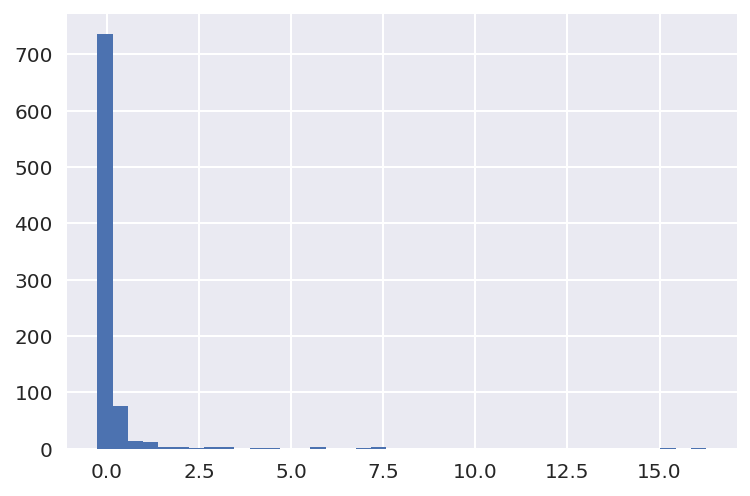

In [136]:
rare_scores.hist(bins=40)

Now we will estimate the standard errors (i.e. the denominator of the z-score) by simply taking the standard deviation of this difference.

In [140]:
rare_scores.name='rare_scores'
rare_scripts=rare_scores.to_frame().reset_index().sort_values('rare_scores', ascending=False)
rare_scripts.head()

,practice,rare_scores
765,Y03472,16.262687
831,Y05320,15.128648
793,Y04404,7.542139
766,Y03484,7.287222
794,Y04424,6.838614


In [146]:
rare_scripts['name']=unique_practices['name']
rare_stuff=rare_scripts[['practice','name','rare_scores']].head(100)


In [138]:
#(unique_practices.sort_values('rare_scores', ascending=False)
 #                .reset_index().loc[:,['code','name','act_cost']]
  #                .head(100))
 

Finally compute the z-scores. Return the practices with the top 100 z-scores in the form `(post_code, practice_name, z-score)`. Note that some practice codes will correspond with multiple names. In this case, use the first match when sorting names alphabetically.

In [ ]:
#rare_scores = ...

In [ ]:
#rare_scripts = [("Y03472", "CONSULTANT DIABETES TEAM", 16.2626871247)] * 100

In [147]:
grader.score.dw__rare_scripts(rare_stuff)

Your score:  1.0


*Copyright &copy; 2020 The Data Incubator.  All rights reserved.*